In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## 1. Load the dataset

In [2]:
data = pd.read_csv('breast_cancer.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Remove 'Unnamed: 32' column which is full of missing values.
data.drop("Unnamed: 32", inplace=True, axis=1)

# Remove 'id' column which is not required in this process
data.drop("id", inplace=True, axis=1)

# Change the target value type to integer
data.diagnosis = [1 if i=="M" else 0 for i in data.diagnosis]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

## 2. Split the dataset(Training/Validation)

In [6]:
X = data.drop('diagnosis', axis = 1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y ,test_size=0.3, random_state=42)

In [7]:
X_train.shape

(398, 30)

In [8]:
X_test.shape

(171, 30)

## 3. Train the models while changing some hyperparameters
- Use two different learning algorithms you know.

## 4. Describe the meaning of the hyperparameters you adjusted

## 5. Performance tables for training set / validation set according to hyperparameter settings

## 6. Find the best hyperparameters for each learning algorithms 

### 3-1) Logistic Regression

#### Hyperparameters

- Penalty: Specify the regularization tool
- C setting: Inverse of regularization strength

In [9]:
cancer = pd.read_csv('breast_cancer.csv')
scaler = StandardScaler()
cancer.drop("Unnamed: 32", inplace=True, axis=1)
cancer.drop("id", inplace=True, axis=1)
cancer.diagnosis = [1 if i=="M" else 0 for i in cancer.diagnosis]

X = cancer.drop('diagnosis', axis = 1)
y = cancer['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y ,test_size=0.3, random_state=42)

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
C_settings = [0.01, 0.1, 1, 10, 100, 1000, 10000]
Penalties = ['l1', 'l2', None]
lr_results = pd.DataFrame(columns=["Regularization", "C Setting", "Training Accuracy", "Test Accuracy"])

for penalty in Penalties:
    if penalty:
        for C in C_settings:
            clf =  LogisticRegression(penalty=penalty, C=C, solver='saga', random_state=42, max_iter=5000)
            clf.fit(X_train_scaled, y_train)

            train_acc = accuracy_score(y_train, clf.predict(X_train_scaled))
            test_acc = accuracy_score(y_test, clf.predict(X_test_scaled))

            lr_results = lr_results.append({
                "Regularization": penalty,
                "C Setting": C,
                "Training Accuracy": train_acc,
                "Test Accuracy": test_acc
            }, ignore_index=True)
    else:
        # penalty=None일 때의 처리
        clf = LogisticRegression(random_state=42, max_iter=5000)
        clf.fit(X_train_scaled, y_train)
        
        train_acc = accuracy_score(y_train, clf.predict(X_train_scaled))
        test_acc = accuracy_score(y_test, clf.predict(X_test_scaled))
        
        lr_results = lr_results.append({
            "Regularization": "None",
            "C Setting": "-",
            "Training Accuracy": train_acc,
            "Test Accuracy": test_acc
        }, ignore_index=True)

C:\Users\oosedus\AppData\Local\Temp\ipykernel_18868\798670684.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lr_results = lr_results.append({
C:\Users\oosedus\AppData\Local\Temp\ipykernel_18868\798670684.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lr_results = lr_results.append({
C:\Users\oosedus\AppData\Local\Temp\ipykernel_18868\798670684.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lr_results = lr_results.append({
C:\Users\oosedus\AppData\Local\Temp\ipykernel_18868\798670684.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lr_results = lr_results.append({
C:\Users\oosedus\anaconda3\lib\site-packages\sklearn

In [11]:
lr_results

,Regularization,C Setting,Training Accuracy,Test Accuracy
0,l1,0.01,0.834171,0.824561
1,l1,0.1,0.972362,0.97076
2,l1,1,0.982412,0.976608
3,l1,10,0.98995,0.97076
4,l1,100,0.98995,0.959064
5,l1,1000,0.98995,0.959064
6,l1,10000,0.98995,0.959064
7,l2,0.01,0.952261,0.947368
8,l2,0.1,0.982412,0.982456
9,l2,1,0.987437,0.97076


In [12]:
lr_results['Test Accuracy'] = pd.to_numeric(lr_results['Test Accuracy'], errors='coerce')
best_result = lr_results.loc[lr_results['Test Accuracy'].idxmax()]
print(best_result)

Regularization             l2
C Setting                 0.1
Training Accuracy    0.982412
Test Accuracy        0.982456
Name: 8, dtype: object


### 3-2) Decision Tree

#### Hyperparameters

-  max_depth: The maximum depth of the tree
- min_samples_leaf: The minimum number of samples required to be at a leaf node
- min_samples_split: The minimum number of samples required to split an internal node

In [13]:
max_depths = range(1,11)
min_samples_leaves = [1,2,5,7,10,20]
min_samples_splits = [2,5,7,10,20]

results = pd.DataFrame(columns=["Max Depth", "Min Samples Leaf", "Min Samples Split", "Training Accuracy", "Test Accuracy"])

for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        for min_samples_leaf in min_samples_leaves:
            if min_samples_leaf >= min_samples_split:
                # min_samples_leaf는 min_samples_split보다 커야 합니다.
                continue
            
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
            clf.fit(X_train, y_train)

            train_acc = accuracy_score(y_train, clf.predict(X_train))
            test_acc = accuracy_score(y_test, clf.predict(X_test))

            results = results.append({
                "Max Depth": max_depth,
                "Min Samples Split": min_samples_split,
                "Min Samples Leaf": min_samples_leaf,
                "Training Accuracy": train_acc,
                "Test Accuracy": test_acc
            }, ignore_index=True)

C:\Users\oosedus\AppData\Local\Temp\ipykernel_18868\1863484658.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\oosedus\AppData\Local\Temp\ipykernel_18868\1863484658.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\oosedus\AppData\Local\Temp\ipykernel_18868\1863484658.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\oosedus\AppData\Local\Temp\ipykernel_18868\1863484658.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\oosedus\AppData\Local\Temp\ipykernel_18868\1863484658.py:20: Fu

C:\Users\oosedus\AppData\Local\Temp\ipykernel_18868\1863484658.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\oosedus\AppData\Local\Temp\ipykernel_18868\1863484658.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\oosedus\AppData\Local\Temp\ipykernel_18868\1863484658.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\oosedus\AppData\Local\Temp\ipykernel_18868\1863484658.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\oosedus\AppData\Local\Temp\ipykernel_18868\1863484658.py:20: Fu

C:\Users\oosedus\AppData\Local\Temp\ipykernel_18868\1863484658.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\oosedus\AppData\Local\Temp\ipykernel_18868\1863484658.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\oosedus\AppData\Local\Temp\ipykernel_18868\1863484658.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\oosedus\AppData\Local\Temp\ipykernel_18868\1863484658.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\oosedus\AppData\Local\Temp\ipykernel_18868\1863484658.py:20: Fu

C:\Users\oosedus\AppData\Local\Temp\ipykernel_18868\1863484658.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\oosedus\AppData\Local\Temp\ipykernel_18868\1863484658.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\oosedus\AppData\Local\Temp\ipykernel_18868\1863484658.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\oosedus\AppData\Local\Temp\ipykernel_18868\1863484658.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\oosedus\AppData\Local\Temp\ipykernel_18868\1863484658.py:20: Fu

In [14]:
results

,Max Depth,Min Samples Leaf,Min Samples Split,Training Accuracy,Test Accuracy
0,1.0,1.0,2.0,0.929648,0.894737
1,1.0,1.0,5.0,0.929648,0.894737
2,1.0,2.0,5.0,0.929648,0.894737
3,1.0,1.0,7.0,0.929648,0.894737
4,1.0,2.0,7.0,0.929648,0.894737
...,...,...,...,...,...
145,10.0,1.0,20.0,0.969849,0.912281
146,10.0,2.0,20.0,0.974874,0.94152
147,10.0,5.0,20.0,0.962312,0.900585
148,10.0,7.0,20.0,0.962312,0.918129


In [15]:
results['Test Accuracy'] = pd.to_numeric(results['Test Accuracy'], errors='coerce')
best_test_row = results.loc[results['Test Accuracy'].idxmax()]

print("Best Test Accuracy")
print(best_test_row)

Best Test Accuracy
Max Depth                 5.0
Min Samples Leaf          2.0
Min Samples Split        20.0
Training Accuracy    0.974874
Test Accuracy         0.94152
Name: 71, dtype: object


[Text(0.6363636363636364, 0.9166666666666666, 'X[22] <= 112.8\ngini = 0.467\nsamples = 398\nvalue = [250, 148]'),
 Text(0.45454545454545453, 0.75, 'X[27] <= 0.16\ngini = 0.135\nsamples = 260\nvalue = [241, 19]'),
 Text(0.36363636363636365, 0.5833333333333334, 'X[13] <= 35.435\ngini = 0.077\nsamples = 249\nvalue = [239, 10]'),
 Text(0.2727272727272727, 0.4166666666666667, 'X[21] <= 33.105\ngini = 0.034\nsamples = 231\nvalue = [227, 4]'),
 Text(0.18181818181818182, 0.25, 'X[14] <= 0.003\ngini = 0.009\nsamples = 214\nvalue = [213, 1]'),
 Text(0.09090909090909091, 0.08333333333333333, 'gini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.2727272727272727, 0.08333333333333333, 'gini = 0.0\nsamples = 204\nvalue = [204, 0]'),
 Text(0.36363636363636365, 0.25, 'gini = 0.291\nsamples = 17\nvalue = [14, 3]'),
 Text(0.45454545454545453, 0.4166666666666667, 'gini = 0.444\nsamples = 18\nvalue = [12, 6]'),
 Text(0.5454545454545454, 0.5833333333333334, 'gini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 T

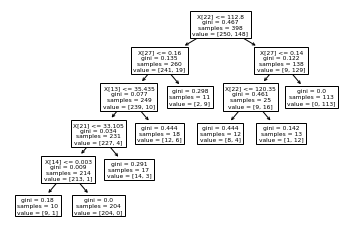

In [16]:
df_clf = DecisionTreeClassifier(min_samples_leaf=2, max_depth=5, min_samples_split=5,random_state=0)
df_clf.fit(X_train, y_train)

tree.plot_tree(clf)